# Code from channel Sentdex to practice Pandas

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib import style


### A solution without changing any files locally and bypass the version control of your package manager (pip) is to define is_list_like like this:


In [9]:
pd.core.common.is_list_like = pd.api.types.is_list_like


In [10]:
from pandas_datareader import data
import pandas_datareader.data as web
style.use("ggplot")

In [23]:
start = datetime.datetime(2012 , 1, 1)
end = datetime.datetime.now()
df = data.DataReader('XOM', 'robinhood', start, end)

In [28]:
df.head(10)

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
XOM    2017-08-14   75.958100  76.501900         False  75.851300  76.336800   
       2017-08-15   75.773600  75.977500         False  75.424100  75.851300   
       2017-08-16   75.220200  75.899900         False  75.064800  75.773600   
       2017-08-17   74.045300  75.035700         False  73.996800  75.016300   
       2017-08-18   74.414300  74.870600         False  73.841400  73.967700   
       2017-08-21   74.161800  74.394900         False  73.870600  74.249200   
       2017-08-22   74.511400  75.089100         False  74.307500  74.326900   
       2017-08-23   74.385200  74.773600         False  74.249200  74.472600   
       2017-08-24   74.113300  74.424000         False  73.987100  74.278400   
       2017-08-25   74.492000  74.890100         False  74.210400  74.336600   

                  session    volume  
symbol begins_at                     
XOM    2017-08-14     reg   8862475  
       2017-08-15     reg  10350948  
       2017-08-16     reg   9117145  
       2017-08-17     reg  13400356  
       2017-08-18     reg  14324342  
       2017-08-21     reg  10084930  
       2017-08-22     reg   9503600  
       2017-08-23     reg   7054254  
       2017-08-24     reg   8678316  
       2017-08-25     reg   6844875

In [59]:
df.session = df.session.astype(str)

In [60]:
df.dtypes

close_price     float64
high_price      float64
interpolated       bool
low_price       float64
open_price      float64
session          object
volume            int64
dtype: object

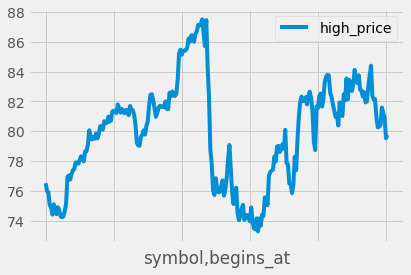

In [63]:
style.use('fivethirtyeight')
df['high_price'].plot()
plt.legend()




### Since dataframe is basically a dictionary now we can play with it accordingly 

In [80]:
print(df["high_price"][:10])

symbol  begins_at 
XOM     2017-08-14    76.5019
        2017-08-15    75.9775
        2017-08-16    75.8999
        2017-08-17    75.0357
        2017-08-18    74.8706
        2017-08-21    74.3949
        2017-08-22    75.0891
        2017-08-23    74.7736
        2017-08-24    74.4240
        2017-08-25    74.8901
Name: high_price, dtype: float64


### Here we convert it to a numpy array and try to manipulate it 

In [107]:
np_price = (np.array(df[["high_price", "low_price"]]))
np_price

array([[76.5019, 75.8513],
       [75.9775, 75.4241],
       [75.8999, 75.0648],
       [75.0357, 73.9968],
       [74.8706, 73.8414],
       [74.3949, 73.8706],
       [75.0891, 74.3075],
       [74.7736, 74.2492],
       [74.424 , 73.9871],
       [74.8901, 74.2104],
       [74.7056, 74.0453],
       [74.2687, 73.8706],
       [74.2298, 73.8511],
       [74.2687, 73.8414],
       [74.6182, 74.1036],
       [75.1134, 74.3852],
       [76.9242, 75.327 ],
       [77.0261, 76.3271],
       [76.7446, 76.3465],
       [77.1136, 76.6087],
       [77.3757, 76.9388],
       [77.4534, 77.0747],
       [77.9   , 77.4534],
       [77.8806, 77.2398],
       [77.8127, 77.3854],
       [78.0554, 77.6622],
       [78.3176, 77.9292],
       [78.1913, 77.4437],
       [77.968 , 77.3563],
       [78.6477, 77.6573],
       [78.6428, 78.2205],
       [79.0846, 78.4438],
       [80.0556, 79.1914],
       [79.672 , 79.206 ],
       [79.4429, 78.8856],
       [79.5895, 78.939 ],
       [79.4924, 79.0846],
 

In [120]:
np_price.shape

(252, 2)

In [145]:
np_low = np_price[:,1]
np_high = np_price[:,0]
np_high


array([76.5019, 75.9775, 75.8999, 75.0357, 74.8706, 74.3949, 75.0891,
       74.7736, 74.424 , 74.8901, 74.7056, 74.2687, 74.2298, 74.2687,
       74.6182, 75.1134, 76.9242, 77.0261, 76.7446, 77.1136, 77.3757,
       77.4534, 77.9   , 77.8806, 77.8127, 78.0554, 78.3176, 78.1913,
       77.968 , 78.6477, 78.6428, 79.0846, 80.0556, 79.672 , 79.4429,
       79.5895, 79.4924, 79.8517, 79.5118, 79.7934, 80.3323, 80.3371,
       80.1041, 80.6673, 80.541 , 80.5605, 80.9692, 80.6381, 80.7158,
       81.3275, 81.3727, 81.2984, 81.2207, 81.7936, 81.512 , 81.2499,
       81.5023, 81.2741, 81.211 , 81.4343, 81.3858, 81.0751, 81.6965,
       81.4138, 81.4236, 81.0905, 80.4437, 79.2286, 79.0424, 79.0228,
       79.6205, 79.7725, 80.0615, 79.7675, 80.3545, 80.6593, 81.7274,
       82.4428, 82.4869, 82.09  , 81.5314, 80.9631, 81.2374, 81.5804,
       81.7078, 81.6294, 81.6588, 81.6098, 81.9963, 81.502 , 81.4726,
       82.58  , 82.335 , 82.6682, 82.4134, 82.3644, 82.5114, 83.4864,
       85.2209, 85.4

In [150]:
print("mean: " + str(np.mean(np_high)) 
        + "\nmode: " + str(np.median(np_high)))

mean: 79.92145476190476
mode: 80.55075


(array([23., 26., 21., 22., 31., 52., 42., 14., 10., 11.]),
 array([73.2674 , 74.69157, 76.11574, 77.53991, 78.96408, 80.38825,
        81.81242, 83.23659, 84.66076, 86.08493, 87.5091 ]),
 <a list of 10 Patch objects>)

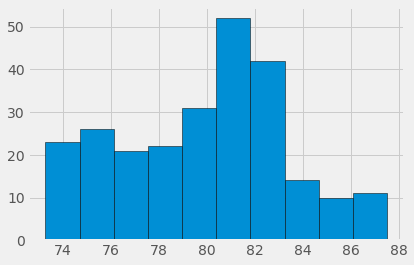

In [146]:
plt.hist(np_high, ec = "k")

mean: 78.887048015873
mode: 79.6991


(array([12., 31., 23., 22., 21., 46., 63., 14., 10., 10.]),
 array([71.431  , 72.95747, 74.48394, 76.01041, 77.53688, 79.06335,
        80.58982, 82.11629, 83.64276, 85.16923, 86.6957 ]),
 <a list of 10 Patch objects>)

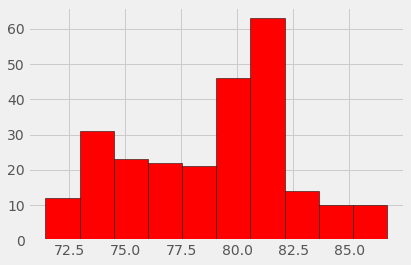

In [152]:
print("mean: " + str(np.mean(np_low)) 
        + "\nmode: " + str(np.median(np_low)))
plt.hist(np_low, ec = "k", color ="red")